In this worksheet we'll discuss the basics of finite difference methods for ODE's and their implementation in Julia. The exercises are designed to give you an opportunity to practice some Julia fundamentals and ask questions about areas that you're unfamiliar with. 
### 1. Basic Math Operations

In [1]:
a = 15
b = 3
println("Addition: ", a + b)
println("Subtraction: ", a - b)
println("Multiplication: ", a * b)
println("Division: ", a / b)
println("Exponentiation: ", a ^ b)

Addition: 18
Subtraction: 12
Multiplication: 45
Division: 5.0
Exponentiation: 3375


In [2]:
x = 23
println("Exponential: ", exp(x))    
println("Natural logarithm: ", log(x))   
println("Square root: ", sqrt(x))  
println("Sine function: ", sin(x))   
println("Cosine function: ", cos(x))   

Exponential: 9.744803446248903e9
Natural logarithm: 3.1354942159291497
Square root: 4.795831523312719
Sine function: -0.8462204041751706
Cosine function: -0.5328330203333975


### 2. Matrix Operations

In [3]:
using LinearAlgebra
A = [4 2 1;
     2 5 3;
     1 3 6]
println(A)
println("zero:\n", zeros(3, 3))
println("Random matrix:", rand(3, 3))
println("diagonal matrix:\n", diagm([1, 2, 3]))

B = rand(3, 3)
println(A+B) #all other operations

[4 2 1; 2 5 3; 1 3 6]
zero:
[0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0]
Random matrix:[0.7438542716982458 0.5323874470066966 0.306621566873726; 0.16099262136762238 0.4087866493630161 0.5855231434972128; 0.9089862986225361 0.8639784141964059 0.16993342279534196]
diagonal matrix:
[1 0 0; 0 2 0; 0 0 3]
[4.060656269488039 2.973118599194282 1.071900513448233; 2.522992036491609 5.390903601296195 3.357903136221367; 1.7551322506037579 3.8952619881181176 6.139688874952993]


In [4]:
λ = eigvals(A)  # Eigenvalues of A
println("Eigenvalues of A: ", λ)

b = [1; 2; 3]  
x = A \ b  # Solving Ax = b
println("Solution to Ax = b: ", x)

Eigenvalues of A: [1.9213469419616902, 3.73015912368826, 9.348493934350051]
Solution to Ax = b: [0.08955223880597016, 0.10447761194029853, 0.43283582089552236]


## 3. Finite Difference Methods
### A. First-Order Finite Differences
The first-order derivative of a function $ u(x)$ can be approximated using finite difference methods.
#### (a) Forward Difference
The forward difference formula is given by: $\frac{du}{dx} \approx \frac{u_{i+1} - u_i}{\Delta x}$
where $\Delta x $ is the step size. This method is first-order accurate, i.e., $ O(\Delta x)$.
#### (b) Backward Difference
The backward difference formula is: $\frac{du}{dx} \approx \frac{u_i - u_{i-1}}{\Delta x}$
This method is also first-order accurate,  $O(\Delta x)$ .
#### (c) Central Difference
A more accurate approximation is obtained using the central difference formula: $\frac{du}{dx} \approx \frac{u_{i+1} - u_{i-1}}{2\Delta x}$
which has second-order accuracy, $ O(\Delta x^2)$ .
### B. Second-Order Finite Difference
The second derivative of  $u(x)$ can be approximated using: $\frac{d^2 u}{dx^2} \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2}$
This method has second-order accuracy, $O(\Delta x^2)$.
#### Summary of Finite Difference Methods
| Method               | Formula                                             | Accuracy Order  |
|----------------------|-----------------------------------------------------|----------------|
| **Forward Difference**  |  $\frac{u_{i+1} - u_i}{\Delta x}$              | $O(\Delta x)$  |
| **Backward Difference** |  $\frac{u_i - u_{i-1}}{\Delta x}$               | $O(\Delta x)$ |
| **Central Difference**  | $\frac{u_{i+1} - u_{i-1}}{2\Delta x}$          | $O(\Delta x^2)$ |
| **Second Derivative**   | $\frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2}$   | $O(\Delta x^2)$ |

In [5]:
function FD(f, x, dx)
    return (f(x + dx) - f(x)) / dx
end
function BD(f, x, dx)
    return (f(x) - f(x-dx)) / dx
end


f(x) = sin(x)  # given function
x_star = π / 4     # point of differentiation
dx = 0.01      # Step-size

df2 = BD(f, x_star, dx)
df1 = FD(f, x_star, dx)
println("Forward difference approximation: ", df1)
println("backward difference approximation: ", df2)
println("Exact value: ", cos(x_star))


Forward difference approximation: 0.7035594916892096
backward difference approximation: 0.710630500575693
Exact value: 0.7071067811865476


### Exercise-1
Can you implement the first-order central difference method in code? If so, can you also extend it to the second-order central difference method?

### 4. Solving an ODE using Finite Differences
We'll begin by using an explicit Euler method to solve the equation    
$$\frac{d y}{d x} = f(x,y) = x^2 - y$$
     
for $x\in[0,10]$, with the initial condition $y(0)=0$. We choose a discretisation number $N=100$. 

In [7]:
x0 = 0
xN = 10
N = 10;

Initialize the arrays with same length, $y_i\approx y(x_i)$

In [8]:
xvals = range(x0, xN, N)
yvals = zeros(N);

Since we have an equation of the form $\frac{d y}{d x}=f(x,y)$, so we take a finite difference approximation to the left-hand side $\frac{d y}{d x}\approx\frac{y(x+\Delta x)-y(x)}{\Delta x}$ (this is Forward Difference scheme), so therefore our ODE becomes:
$y(x+\Delta x)=y(x)+\Delta x\,f(x,y)=y(x)+\Delta x\,(x^2 - y(x))$.

In [9]:
dx = xvals[2] - xvals[1]; # step-size
for n in 1:N-1 
    yvals[n+1] = yvals[n] + dx*(xvals[n]^2 - yvals[n]); # y(x+dx)=y(x)+dx*f(x)
end

Now we just have to plot our results, noting that the exact solution for comparison is 
$$ y(x) = x^2-2x-2\exp(-x)+2 $$

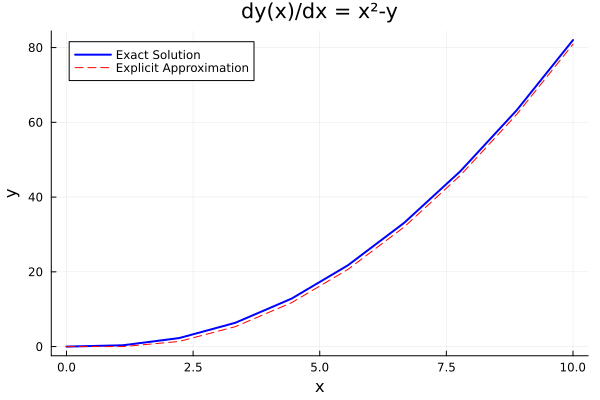

In [12]:
using Plots #load in the Plots package
plot(xvals, xvals.^2-2*xvals .+2-2*exp.(-xvals), label="Exact Solution", color=:blue, linewidth=2) #plot the exact solution
plot!(xvals, yvals, label="Explicit Approximation", markersize=3, color=:red, linestyle=:dash)
xlabel!("x")
ylabel!("y")
title!("dy(x)/dx = x²-y")

In the explicit method above, we have $y(x+\Delta x)=y(x)+\Delta x\,f(x,y)=y(x)+\Delta x\,(x^2 - y(x))$. We assumed that the gradient function $f$ is approximately equal to $f(x,y(x))$ for all $x\in[x,x+\Delta x]$, this is known as the forwards approximation. We could have instead assumed that is was equal to $f(x+\Delta x, y(x+\Delta x))$ on this interval (the backwards approximation), if we do so we construct an implicit Euler method, $y(x+\Delta x)=y(x)+\Delta x\,f(x+\Delta x, y(x+\Delta x))$.

In the above example this becomes:
$$ y(x+\Delta x)=y(x)+\Delta x\,f(x+\Delta x, y(x+\Delta x))=y(x)+\Delta x\,((x+\Delta x)^2 - y(x+\Delta x))$$
### Exercise-2
Use code similar to that above to calculate and plot an implicit solution to the ODE. 

We'll now compare explicit and implicit methods with the following example problem.
$$ y'(t) = \frac1\tau(\overline y-y(t)), \qquad y(0)=y_0 \qquad x\in[0,10]. $$
The exact solution is given by 
$$ y(t)=(y_0-\overline y) \exp({-t/\tau})+\overline y $$
Use the parameter values $\tau=0.1$, $\overline y=10$. 

For the explicit method: 
 $$ \frac{y_{n+1}-y_n}{\Delta t} = \frac1\tau(\overline y-y_n) \Rightarrow y_{n+1} = y_n + \frac{\Delta t}{\tau}(\overline y-y_n)  $$
For the implicit method: 
$$ \frac{y_{n+1}-y_n}{\Delta t}=\frac1\tau(\overline y-y_{n+1}) \Rightarrow y_{n+1}(1+\frac{\Delta t}{\tau}) = y_n+\frac{\Delta t}{\tau}\overline y $$
### Exercise-3
Write code and compare